In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from sklearn.metrics import roc_curve, auc,RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import dataframe_image as dfi


In [22]:
df = pd.read_csv("../Dataset/valve_features.csv").iloc[:,1:]
df

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
0,-0.078432,0.083072,2.846902e-06,0.005092,0.027839,0.007812,0.198730,534.462569,842.763456,861.328125,1565.728661,0.004988,0.000133,0.002137,0.012551,0.005413,0.005789,0.034216,0
1,-0.074640,0.091593,-7.319340e-07,0.004906,0.077212,0.028809,0.214355,1289.842708,1608.087992,2680.883789,3643.133191,0.004762,0.000488,0.005983,0.014089,0.006951,0.005223,0.029242,0
2,-0.067114,0.083659,2.985572e-07,0.005200,0.058272,0.031738,0.200684,893.401721,1333.155533,1819.555664,2813.130631,0.005101,0.000402,0.004332,0.015995,0.008361,0.005700,0.019618,0
3,-0.074049,0.082879,-2.335126e-06,0.005244,0.063717,0.033691,0.197754,926.309215,1352.008946,1894.921875,2786.076734,0.005138,0.000408,0.005724,0.016069,0.005512,0.005686,0.017246,0
4,-0.064568,0.075072,-7.828104e-08,0.005326,0.069678,0.029297,0.187500,1269.865358,1674.007315,2390.185547,3908.825938,0.005219,0.000483,0.005077,0.015526,0.007869,0.006105,0.029943,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,-0.042108,0.035794,-2.517581e-06,0.005197,0.075104,0.034180,0.141113,1207.502981,1527.578189,2239.453125,3130.033432,0.005027,0.000440,0.008396,0.014203,0.007967,0.005969,0.028064,1
4166,-0.045548,0.040276,-2.233977e-06,0.005495,0.057363,0.022949,0.153320,938.081211,1328.328487,1927.221680,2852.749726,0.005365,0.000347,0.002127,0.014895,0.008025,0.006704,0.027793,1
4167,-0.049755,0.040903,-5.744654e-07,0.004968,0.080390,0.034180,0.158203,1191.382068,1583.492586,2174.853516,3233.802487,0.004790,0.000635,0.052457,0.014129,0.007930,0.005245,0.023782,1
4168,-0.068714,0.106759,-2.188828e-06,0.005154,0.052477,0.023926,0.173828,923.132674,1216.404764,1894.921875,2577.464461,0.005078,0.000313,0.002913,0.014419,0.006626,0.005858,0.020515,1


In [23]:
df.corr()

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
y_min,1.000000,-0.685068,-0.029525,-0.288911,-0.048816,0.006754,-0.529280,0.031583,-0.048062,0.069700,-0.019961,-0.104162,-0.029929,-0.035311,-0.273530,0.026085,-0.282917,-0.347915,0.026164
y_max,-0.685068,1.000000,-0.021540,0.300211,0.007732,-0.030375,0.279756,-0.035516,0.033456,-0.058527,0.037919,0.182592,0.001594,0.004364,0.436461,0.013797,0.278154,0.278303,-0.052506
y_mean,-0.029525,-0.021540,1.000000,-0.053743,0.041215,0.028414,0.077927,0.025193,0.033441,0.007921,0.021720,-0.067003,0.029044,0.046286,-0.052032,0.016373,-0.048337,-0.010385,0.027144
y_std,-0.288911,0.300211,-0.053743,1.000000,-0.492200,-0.469512,-0.345914,-0.457459,-0.412603,-0.369238,-0.317877,0.908804,-0.444481,-0.190311,0.724828,0.227098,0.947586,0.653633,-0.032896
zcr_mean,-0.048816,0.007732,0.041215,-0.492200,1.000000,0.878141,0.505463,0.847365,0.937673,0.774624,0.818677,-0.655322,0.949052,0.451833,-0.214221,-0.144312,-0.421702,-0.062873,0.008412
zcr_min,0.006754,-0.030375,0.028414,-0.469512,0.878141,1.000000,0.360842,0.847192,0.829231,0.765554,0.733454,-0.579442,0.821021,0.424198,-0.186140,0.010549,-0.404840,-0.103112,0.014071
zcr_max,-0.529280,0.279756,0.077927,-0.345914,0.505463,0.360842,1.000000,0.283691,0.423766,0.198497,0.310469,-0.496894,0.474039,0.239142,-0.221635,-0.250308,-0.318951,-0.034818,-0.052856
spec_cent_min,0.031583,-0.035516,0.025193,-0.457459,0.847365,0.847192,0.283691,1.000000,0.913237,0.948673,0.896349,-0.554731,0.787545,0.369763,-0.177497,0.074424,-0.385147,-0.094069,0.010260
spec_cent_mean,-0.048062,0.033456,0.033441,-0.412603,0.937673,0.829231,0.423766,0.913237,1.000000,0.872509,0.961318,-0.560705,0.903835,0.433420,-0.113994,-0.095678,-0.359806,-0.043030,0.000492
spec_roll_min,0.069700,-0.058527,0.007921,-0.369238,0.774624,0.765554,0.198497,0.948673,0.872509,1.000000,0.898794,-0.443417,0.761018,0.357778,-0.112904,0.124263,-0.315549,-0.080812,0.011795


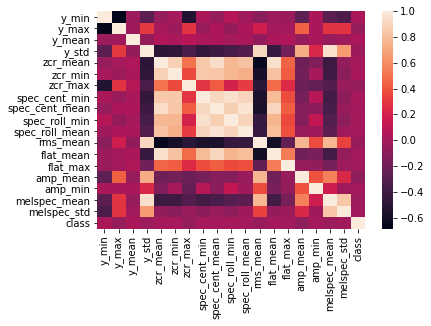

In [24]:
heat_map = sns.heatmap(df.corr())
fig = heat_map.get_figure()
fig.savefig("../img/valve_model/correlation_heatmap.PNG",bbox_inches="tight")

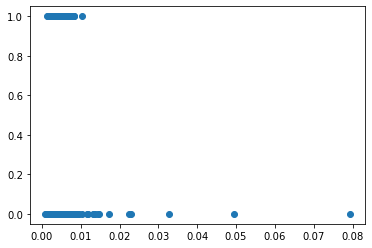

In [25]:
plt.scatter(df["melspec_mean"],df["class"])

In [26]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1])

In [27]:
pipeline_lr = Pipeline([('scalar1',StandardScaler()),
                        ('lr_classifier',LogisticRegression(random_state=0))])

pipeline_rf = Pipeline([('scalar2',StandardScaler()),
                        ('rf_classifier',RandomForestClassifier(n_estimators=int((len(df.columns)**0.5//1)+2), criterion= 'entropy',random_state=0))])

pipeline_dt = Pipeline([('scalar3',StandardScaler()),
                        ('dt_classifier',DecisionTreeClassifier(criterion="entropy",random_state=0))])

pipeline_GaussianNB = Pipeline([('scalar4',StandardScaler()),
                        ('gaussianNB_classifier',GaussianNB())])

pipeline_SVM = Pipeline([('scalar5',StandardScaler()),
                        ('svm_classifier',SVC(kernel="linear",C=1))])


In [28]:
pipelines = [pipeline_lr,pipeline_rf,pipeline_dt,pipeline_GaussianNB,pipeline_SVM]

pipe_dict = {0:'Logistic Regression',1:'Random Forest',2:'Decision Tree',3:'GaussianNB',4:'Support Vector Machine'}

In [29]:
import warnings
warnings.filterwarnings('ignore')

for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [30]:
best_f1=0.0
best_classifier_indx = 0
best_pipeline=""
evaluation_metrics = ["f1","accuracy","precision","recall"]

In [31]:
result = {}
list_of_results = []

In [32]:
for i,model in enumerate(pipelines):
    pred = model.predict(X_test)
    print(f"{pipe_dict[i]}")
    result.update()
    for metric in evaluation_metrics:
        scores = np.round(cross_val_score(model,df.iloc[:,:-1],df.iloc[:,-1], cv=5,scoring=metric),2)
        print(f"{pipe_dict[i]} {metric}: {scores}, mean: {np.mean(scores)}")
        result.update({"model":pipe_dict[i],
                       metric+"scores":scores,
                       metric+"_mean":np.mean(scores)})
        
    
    score = cross_val_score(model,df.iloc[:,:-1],df.iloc[:,-1], cv=5,scoring="f1")
    print(f"mean f1 = {np.mean(score)}, best f1: {best_f1}")
 

    if np.mean(score)>best_f1:

        best_f1 =  np.mean(score)
        best_pipeline=model
        best_classifier_idnx = i
    list_of_results.append(result)
    result = {}

print(f"Classifier with the best accuracy:{pipe_dict[best_classifier_idnx]}")

Logistic Regression
Logistic Regression f1: [0. 0. 0. 0. 0.], mean: 0.0
Logistic Regression accuracy: [0.88 0.88 0.88 0.88 0.88], mean: 0.8800000000000001
Logistic Regression precision: [0. 0. 0. 0. 0.], mean: 0.0
Logistic Regression recall: [0. 0. 0. 0. 0.], mean: 0.0
mean f1 = 0.0, best f1: 0.0
Random Forest
Random Forest f1: [0.72 0.68 0.63 0.48 0.07], mean: 0.5159999999999999
Random Forest accuracy: [0.94 0.94 0.94 0.91 0.87], mean: 0.9199999999999999
Random Forest precision: [0.71 0.96 0.98 0.79 0.24], mean: 0.736
Random Forest recall: [0.73 0.53 0.47 0.34 0.04], mean: 0.422
mean f1 = 0.5172347810065758, best f1: 0.0
Decision Tree
Decision Tree f1: [0.59 0.73 0.68 0.5  0.2 ], mean: 0.54
Decision Tree accuracy: [0.88 0.95 0.93 0.89 0.84], mean: 0.898
Decision Tree precision: [0.5  0.88 0.72 0.52 0.24], mean: 0.5719999999999998
Decision Tree recall: [0.74 0.62 0.65 0.48 0.18], mean: 0.534
mean f1 = 0.5411849174106307, best f1: 0.5172347810065758
GaussianNB
GaussianNB f1: [0.19 0.51 

In [33]:
evaluation_metrics_df = pd.DataFrame(list_of_results)
evaluation_metrics_df

,model,f1scores,f1_mean,accuracyscores,accuracy_mean,precisionscores,precision_mean,recallscores,recall_mean
0,Logistic Regression,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000,"[0.88, 0.88, 0.88, 0.88, 0.88]",0.880,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000
1,Random Forest,"[0.72, 0.68, 0.63, 0.48, 0.07]",0.516,"[0.94, 0.94, 0.94, 0.91, 0.87]",0.920,"[0.71, 0.96, 0.98, 0.79, 0.24]",0.736,"[0.73, 0.53, 0.47, 0.34, 0.04]",0.422
2,Decision Tree,"[0.59, 0.73, 0.68, 0.5, 0.2]",0.540,"[0.88, 0.95, 0.93, 0.89, 0.84]",0.898,"[0.5, 0.88, 0.72, 0.52, 0.24]",0.572,"[0.74, 0.62, 0.65, 0.48, 0.18]",0.534
3,GaussianNB,"[0.19, 0.51, 0.31, 0.15, 0.2]",0.272,"[0.49, 0.85, 0.87, 0.81, 0.49]",0.702,"[0.11, 0.41, 0.38, 0.15, 0.12]",0.234,"[0.52, 0.67, 0.26, 0.15, 0.56]",0.432
4,Support Vector Machine,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000,"[0.89, 0.88, 0.88, 0.88, 0.88]",0.882,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000


In [34]:
evaluation_metrics_df = pd.DataFrame(list_of_results)
evaluation_metrics_df

,model,f1scores,f1_mean,accuracyscores,accuracy_mean,precisionscores,precision_mean,recallscores,recall_mean
0,Logistic Regression,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000,"[0.88, 0.88, 0.88, 0.88, 0.88]",0.880,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000
1,Random Forest,"[0.72, 0.68, 0.63, 0.48, 0.07]",0.516,"[0.94, 0.94, 0.94, 0.91, 0.87]",0.920,"[0.71, 0.96, 0.98, 0.79, 0.24]",0.736,"[0.73, 0.53, 0.47, 0.34, 0.04]",0.422
2,Decision Tree,"[0.59, 0.73, 0.68, 0.5, 0.2]",0.540,"[0.88, 0.95, 0.93, 0.89, 0.84]",0.898,"[0.5, 0.88, 0.72, 0.52, 0.24]",0.572,"[0.74, 0.62, 0.65, 0.48, 0.18]",0.534
3,GaussianNB,"[0.19, 0.51, 0.31, 0.15, 0.2]",0.272,"[0.49, 0.85, 0.87, 0.81, 0.49]",0.702,"[0.11, 0.41, 0.38, 0.15, 0.12]",0.234,"[0.52, 0.67, 0.26, 0.15, 0.56]",0.432
4,Support Vector Machine,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000,"[0.89, 0.88, 0.88, 0.88, 0.88]",0.882,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000


In [35]:
dfi.export(evaluation_metrics_df,"../img/valve_model/evaluation_df.PNG")

In [36]:
pred = pipeline_dt.predict(X_test)

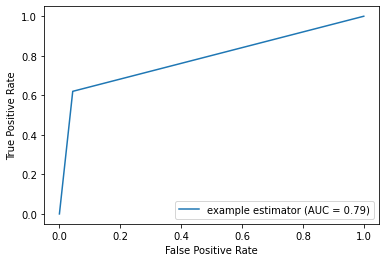

In [37]:
fpr, tpr, thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
        estimator_name='example estimator')

display.plot()
plt.show()
display.figure_.savefig("../img/valve_model/roc_curve.PNG")

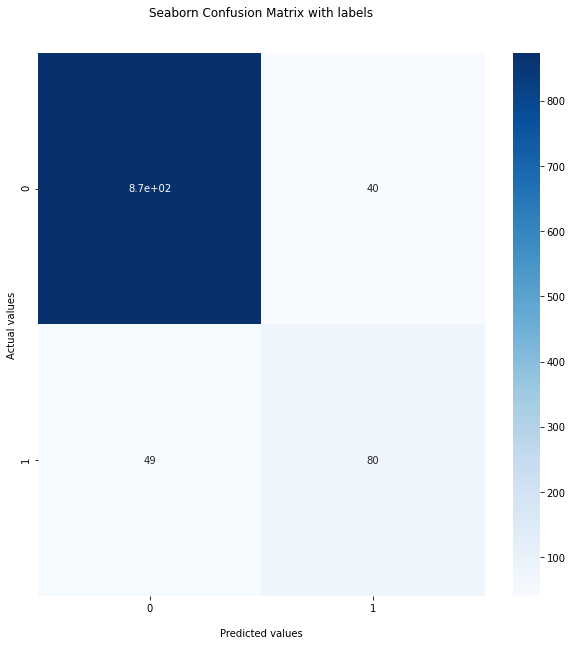

In [38]:

cm = confusion_matrix(y_test,pred)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual values');

## Ticket labels - List must be in alphabetical order


## Display the visualization of the Confusion Matrix.
plt.show()
fig.savefig("../img/valve_model/confusion_matrix.PNG", bbox_inches="tight")
